In [2]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [12]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('DXG-Historical-Data.csv')


In [27]:
df1=df[::-1].reset_index()['Price']
df1 = df1.str.replace(',', '')

In [28]:
df1

0        6066.5
1        6166.4
2        6091.5
3        6141.4
4        6141.4
         ...   
1795    18100.0
1796    18300.0
1797    19000.0
1798    18500.0
1799    18750.0
Name: Price, Length: 1800, dtype: object

In [29]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
df1

array([[0.        ],
       [0.00245554],
       [0.0006145 ],
       ...,
       [0.31790529],
       [0.3056153 ],
       [0.3117603 ]])

In [87]:
train_data = df1[:int(0.8*len(df1))]
test_data = df1[int(0.8*len(df1)):]
train_data

array([[0.        ],
       [0.00245554],
       [0.0006145 ],
       ...,
       [0.28226431],
       [0.25276832],
       [0.25768432]])

In [117]:
len(test_data)

360

In [83]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [84]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [85]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [86]:
len(X_test)

339

In [40]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\luuth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0246 - val_loss: 0.0021
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014 - val_loss: 9.3319e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.2349e-04 - val_loss: 3.0527e-04
Epoch 66/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.4918e-04 - val_loss: 2.8109e-04
Epoch 67/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.3664e-04 - val_loss: 3.5892e-04
Epoch 68/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.0821e-04 - val_loss: 3.7281e-04
Epoch 69/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.6249e-04 - val_loss: 2.7270e-04
Epoch 70/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.8961e-04 - val_loss: 2.6700e-04
Epoch 71/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.3574e-04 - val_loss: 2.6159e-04
Epoch 72/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.3981e-04 - val_loss: 2.6744e-04
Epoch 73/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.7030e-04 - val_loss: 2.7202e-04
Epoch 74/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.9543e-04 - val_loss: 2.9821e-04
Epoch 75/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.

In [120]:
y_pred=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [121]:
y_pred_new_lstm = scaler.inverse_transform(y_pred.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([ytest], dtype=np.float32))

In [122]:
y_pred=scaler.inverse_transform(y_pred)

In [125]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_test_new_lstm - y_pred_new_lstm)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 603.7511


In [110]:
ytest

array([0.12126538, 0.12986837, 0.11143338, 0.09324419, 0.076284  ,
       0.0605528 , 0.075055  , 0.09054039, 0.10651738, 0.10897538,
       0.10160139, 0.08685339, 0.09422739, 0.11020438, 0.12741038,
       0.14584537, 0.16550936, 0.18640235, 0.20975334, 0.22204333,
       0.19623435, 0.17288336, 0.19500535, 0.20360834, 0.17902835,
       0.20115034, 0.19869234, 0.22204333, 0.22204333, 0.19746335,
       0.18025735, 0.17902835, 0.18640235, 0.17534135, 0.15321936,
       0.16919636, 0.16673836, 0.15567736, 0.16428036, 0.18517335,
       0.18271535, 0.18025735, 0.17534135, 0.16428036, 0.15936436,
       0.17902835, 0.17165436, 0.16796736, 0.16673836, 0.18517335,
       0.19869234, 0.19500535, 0.19746335, 0.20483734, 0.21712734,
       0.19254735, 0.18148635, 0.18025735, 0.18271535, 0.16305136,
       0.15813536, 0.15321936, 0.13601337, 0.11634938, 0.10283039,
       0.12003638, 0.12495238, 0.12495238, 0.14338737, 0.14092937,
       0.12126538, 0.11880738, 0.10528838, 0.09201519, 0.09668

In [55]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-20:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.3148874]
21
1 day input [0.2970123  0.28963831 0.2982413  0.2945543  0.2994703  0.3043863
 0.3093023  0.3068443  0.2970123  0.3019283  0.2945543  0.28718031
 0.28103531 0.2970123  0.2957833  0.3006993  0.31790529 0.3056153
 0.3117603  0.3148874 ]
1 day output [[0.3176705]]
2 day input [0.28963831 0.2982413  0.2945543  0.2994703  0.3043863  0.3093023
 0.3068443  0.2970123  0.3019283  0.2945543  0.28718031 0.28103531
 0.2970123  0.2957833  0.3006993  0.31790529 0.3056153  0.3117603
 0.3148874  0.31767049]
2 day output [[0.32068357]]
3 day input [0.2982413  0.2945543  0.2994703  0.3043863  0.3093023  0.3068443
 0.2970123  0.3019283  0.2945543  0.28718031 0.28103531 0.2970123
 0.2957833  0.3006993  0.31790529 0.3056153  0.3117603  0.3148874
 0.31767049 0.32068357]
3 day output [[0.3239324]]
4 day input [0.2945543  0.2994703  0.3043863  0.3093023  0.3068443  0.2970123
 0.3019283  0.2945543  0.28718031 0.28103531 0.2970123  0.2957833
 0.3006993  0.31790529 0.3056153  0.3117603  0.3148874 

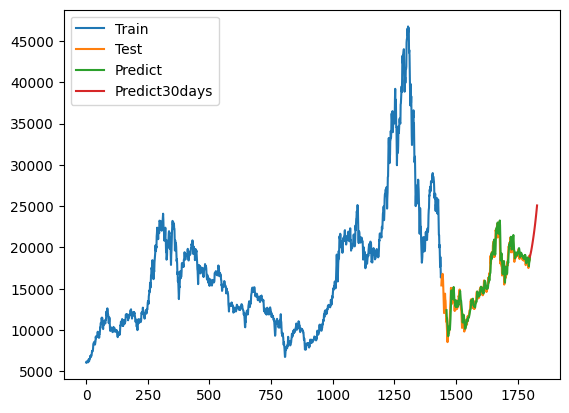

In [126]:
# 14.Vẽ hình
train_size = len(train_data)
test_size = len(test_data)

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+21, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()